In [1]:
import sys
import os

# add the main directory to the notebook
sys.path.append(os.path.abspath(os.path.join('..')))

from models.QCNN_circuit import QCNN
from data.data import data_load_and_process
#import models.utils.embedding
import matplotlib.pyplot as plt
import numpy as np
from training.Training import circuit_training
from benchmarking.Benchmarking import accuracy_test, round_predictions_f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
"""
Here are possible combinations of benchmarking user could try.
Unitaries: ['U_TTN', 'U2_equiv', 'U4_equiv', 'U_5', 'U_6', 'U_9', 'U_13', 'U_14', 'U_15', 'U_SO4', 'U_SU4', 'U_SU4_no_pooling', 'U_SU4_1D', 'U_9_1D']
U_num_params: [2, 6, 6, 10, 10, 2, 6, 6, 4, 6, 15, 15, 15, 2]
feature_reduction: ['img_nxn','resize_flat_nxn', 'pca_n']
embedding_type: ["Equivariant-Amplitude", "Amplitude", "Angle", "Angle-compact"]
dataset: 'mnist' or 'fashion_mnist' or "quark-gluon"
circuit: 'QCNN' 
cost_fn: 'mse' or 'cross_entropy'
Note: when using 'mse' as cost_fn binary="True" is recommended, when using 'cross_entropy' as cost_fn must be binary="False".
"""


# invariant testings

# U2_equiv is invariant under p4m using MSE
# U2_equiv is invariant under reflections over X using cross_entropy 


params = np.random.randn(40)
U_params = 6
U = "U2_equiv"
embedding_type = "Equivariant-Amplitude"
circuit = "QCNN"
cost_fn = "mse"
binary = True
dataset = "mnist"
dimension = 16

X_train, X_test, Y_train, Y_test =  data_load_and_process(dataset = dataset, classes=[1,0], feature_reduction= "img_nxn", binary=True, dimension = dimension)

print(X_train.shape)

(12665, 16, 16, 1)


In [3]:
loss_history, trained_params = circuit_training(X_train, Y_train, U, U_params, embedding_type, circuit, cost_fn, steps = 50, learning_rate = 0.05, batch_size = 128)

iteration:  0  cost:  1.0797809260416238
iteration:  1  cost:  1.0246974781358258
iteration:  2  cost:  0.9831853033155961
iteration:  3  cost:  0.9712740086012366
iteration:  4  cost:  0.9100276365612642
iteration:  5  cost:  0.8606837844966453
iteration:  6  cost:  0.8618585107683937
iteration:  7  cost:  0.8736579611300895
iteration:  8  cost:  0.9005236853501326
iteration:  9  cost:  0.8503386725064045
iteration:  10  cost:  0.8553024340455909
iteration:  11  cost:  0.8606358180694036
iteration:  12  cost:  0.8623576552622297
iteration:  13  cost:  0.8324683795008877
iteration:  14  cost:  0.8364569261108173
iteration:  15  cost:  0.7927177996392245
iteration:  16  cost:  0.8058084608624979
iteration:  17  cost:  0.8128059611648074
iteration:  18  cost:  0.8069870575199648
iteration:  19  cost:  0.7790975058891074
iteration:  20  cost:  0.7709467252222154
iteration:  21  cost:  0.7604200678538657
iteration:  22  cost:  0.7611426925704282
iteration:  23  cost:  0.7526001749447996
it

-1
 Output with Probabilities for Original Image: -0.20243031434758318
 Output with Probabilities for Image Reflected over Y-axis: -0.20243031434758318
 Output with Probabilities for Image Reflected over X-axis: -0.2024303143475832
 Output with Probabilities for Image Rotated 90 Degrees: -0.20243031434758327


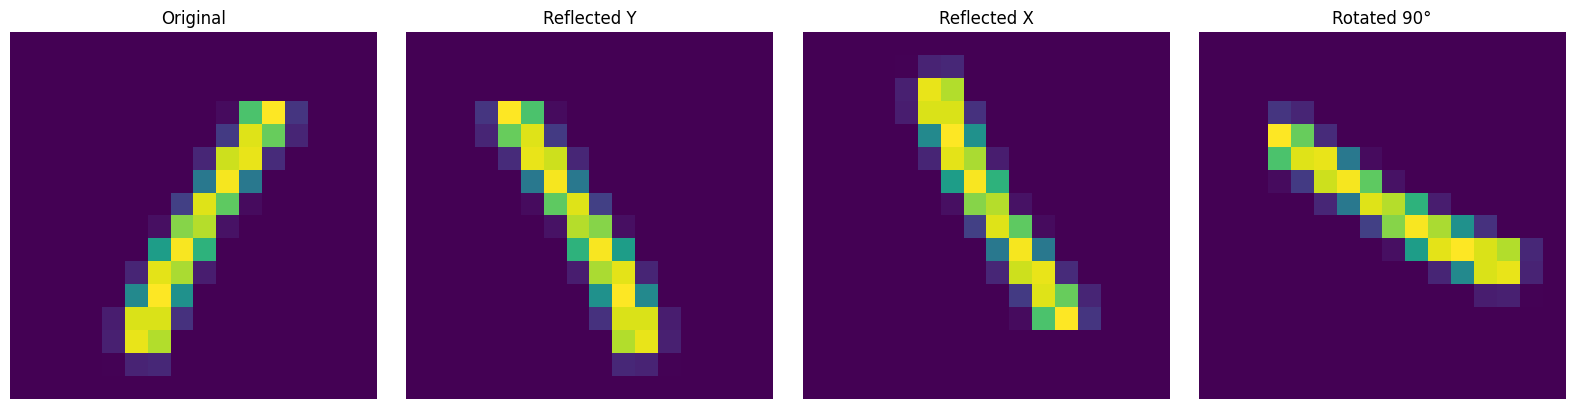

In [13]:
n_qubits = 8
layers = 1 
#data and transformed data
matrix = np.array(X_train[1])
matrix_reflected_y = np.fliplr(matrix) # Image Reflected over Y-axis
matrix_reflected_x = np.flipud(matrix) # Image Reflected over X-axis
matrix_rotated_90 = np.rot90(matrix) # Image rotated 90 degrees


print(Y_train[1])
result1 = QCNN(matrix, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers )
result2 = QCNN(matrix_reflected_y, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers )
result3 = QCNN(matrix_reflected_x, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers )
result4 = QCNN(matrix_rotated_90, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers )

print(f" Output with Probabilities for Original Image: {result1}")
print(f" Output with Probabilities for Image Reflected over Y-axis: {result2}")
print(f" Output with Probabilities for Image Reflected over X-axis: {result3}")
print(f" Output with Probabilities for Image Rotated 90 Degrees: {result4}")

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(matrix)
plt.axis('off')  

plt.subplot(1, 4, 2)
plt.title('Reflected Y')
plt.imshow(matrix_reflected_y)
plt.axis('off') 

plt.subplot(1, 4, 3)
plt.title('Reflected X')
plt.imshow(matrix_reflected_x)
plt.axis('off')  

plt.subplot(1, 4, 4)
plt.title('Rotated 90°')
plt.imshow(matrix_rotated_90)
plt.axis('off') 

plt.tight_layout()  
plt.show()

In [10]:
predictions = [QCNN(x, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers) for x in X_test]

accuracy = accuracy_test(predictions, Y_test, cost_fn, binary)
accuracy

0.9801418439716312

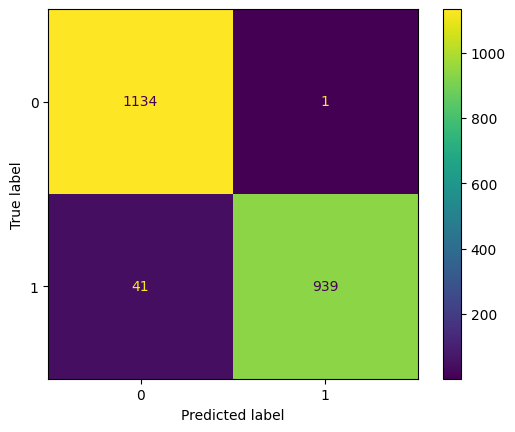

In [11]:
round_predictions = round_predictions_f(predictions, cost_fn)

cm = confusion_matrix(Y_test, round_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

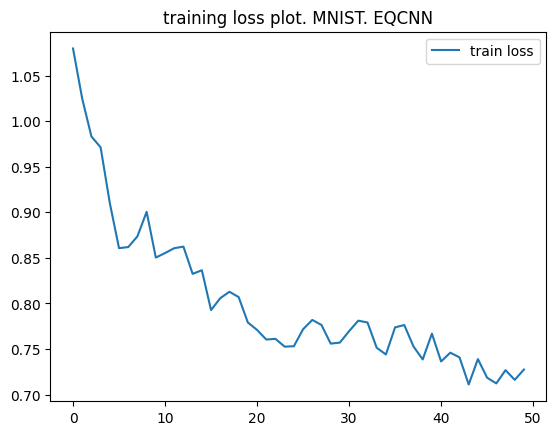

In [15]:
plt.plot(loss_history, label = "train loss")
plt.title("training loss plot. MNIST. EQCNN")
plt.yscale("linear")
plt.legend()
plt.show()